# EDA Análisis exploratorio de datos

## 1 Importando librerías necesarias

In [1]:
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import folium
from folium.plugins import HeatMap


## 2. Recordando los requerimientos finales del Analisis de Datos

Se debe colocar los graficos mas representativos que nos den algunas conclusiones sobre la data suministrada. Además, se debe mostrar dos KPI's:
- Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.
- Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

Por lo cual se debe analizar la variable `num victimas` en todo su impacto sobre la data suministrada, cargada y transformada hasta ahora.



## 3 Analizando el dataset limpio 

* `homicidios_T_EDA.xlsx` - Cuenta con 28 Columnas y 717 filas
Cada registro contiene 28 características o columnas.  Las columnas son:
1. "Id": identificador unico del siniestro (String)
2. "Rol":	Posición relativa al vehículo que presentaba la víctima en el momento del siniestro
3. "Sexo":	Sexo informado por fuente policial de la víctima
4. "Edad":	Edad de la víctima al momento del siniestro
5. "Fecha fallecimiento":	Fecha de fallecimiento de la víctima
6. "Rango edad": Rango en el que está la victima
7. "Num víctimas": cantidad de víctimas (númerico)
8. "Fecha": fecha en formato dd/mm/aaaa (numérico)
9. "Mes": mes (numérico)
10. "Día": día del mes (numérico)
11. "Hora completa":
12. "Hora": hora del siniestro (String)
13. "Lugar del hecho": Dirección del hecho (string)
14. "Tipo de calle": Tipo de arteria. En el caso de intersecciones a nivel se clasifica según la de mayor jerarquía
15. "Calle": nombre de la arteria donde se produjo el hecho
16. "Cruce": cruce en caso de que sea una encrucijada
17. "Dirección Normalizada": direccion en formato normalizado USIG
18. "Comuna": Comuna asociada a la dirección del siniestro
19. "XY (CABA)":	geocodificación plana
20. "pos x":	longitud con separador punto. WGS84
21. "pos y":	latitud con separador punto. WGS84
22. "Participantes":	conjunción de víctima y acusado
23. "Victima":	Vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos.
24. "Acusado":	Vehículo que ocupaba quien resultó acusado/a del hecho, sin implicar culpabilidad lega
25. "Coordenada X": las coordenadas CABA X
26. "Coordenada Y": las coordenadas CABA Y
27. "Barrios": Barrios asociados a la comuna de cada siniestro.
28. "Día de la semana": Día de la semana en la que ocurrió el siniestro

## 3.  Lectura del dataset limpio `homicidios_T_EDA`

In [43]:
df= pd.read_csv('data/homicidios_T_EDA.csv')
df.head(3)

,Id,Rol,Sexo,Edad,Fecha fallecimiento,Rango edad,Num víctimas,Fecha,Año,Mes,...,Xy (caba),Pos x,Pos y,Participantes,Victima,Acusado,Coordenada x,Coordenada y,Barrios,Día semana
0,2016-0001,CONDUCTOR,MASCULINO,19,2016-01-01,Menos de 20,1.0,2016-01-01,2016.0,1.0,...,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,98896.782384,93532.434378,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,Viernes
1,2016-0002,CONDUCTOR,MASCULINO,70,2016-01-02,Entre 61-80,1.0,2016-01-02,2016.0,1.0,...,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,95832.055711,95505.416420,LINIERS - MATADEROS - PARQUE AVELLANEDA,Sabado
2,2016-0003,CONDUCTOR,MASCULINO,30,2016-01-03,Entre 21- 40,1.0,2016-01-03,2016.0,1.0,...,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,106684.290900,99706.576878,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,Domingo


## 4 Análisis de datos

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

### 4.1 Análisis de cada variable de manera individual
Nos permite entender las características generales de cada variable de nuestro set de datos 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     717 non-null    object 
 1   Rol                    717 non-null    object 
 2   Sexo                   717 non-null    object 
 3   Edad                   717 non-null    int64  
 4   Fecha fallecimiento    648 non-null    object 
 5   Rango edad             717 non-null    object 
 6   Num víctimas           702 non-null    float64
 7   Fecha                  702 non-null    object 
 8   Año                    702 non-null    float64
 9   Mes                    702 non-null    float64
 10  Día                    702 non-null    float64
 11  Hora completa          702 non-null    object 
 12  Hora                   701 non-null    float64
 13  Lugar del hecho        702 non-null    object 
 14  Tipo de calle          702 non-null    object 
 15  Calle 

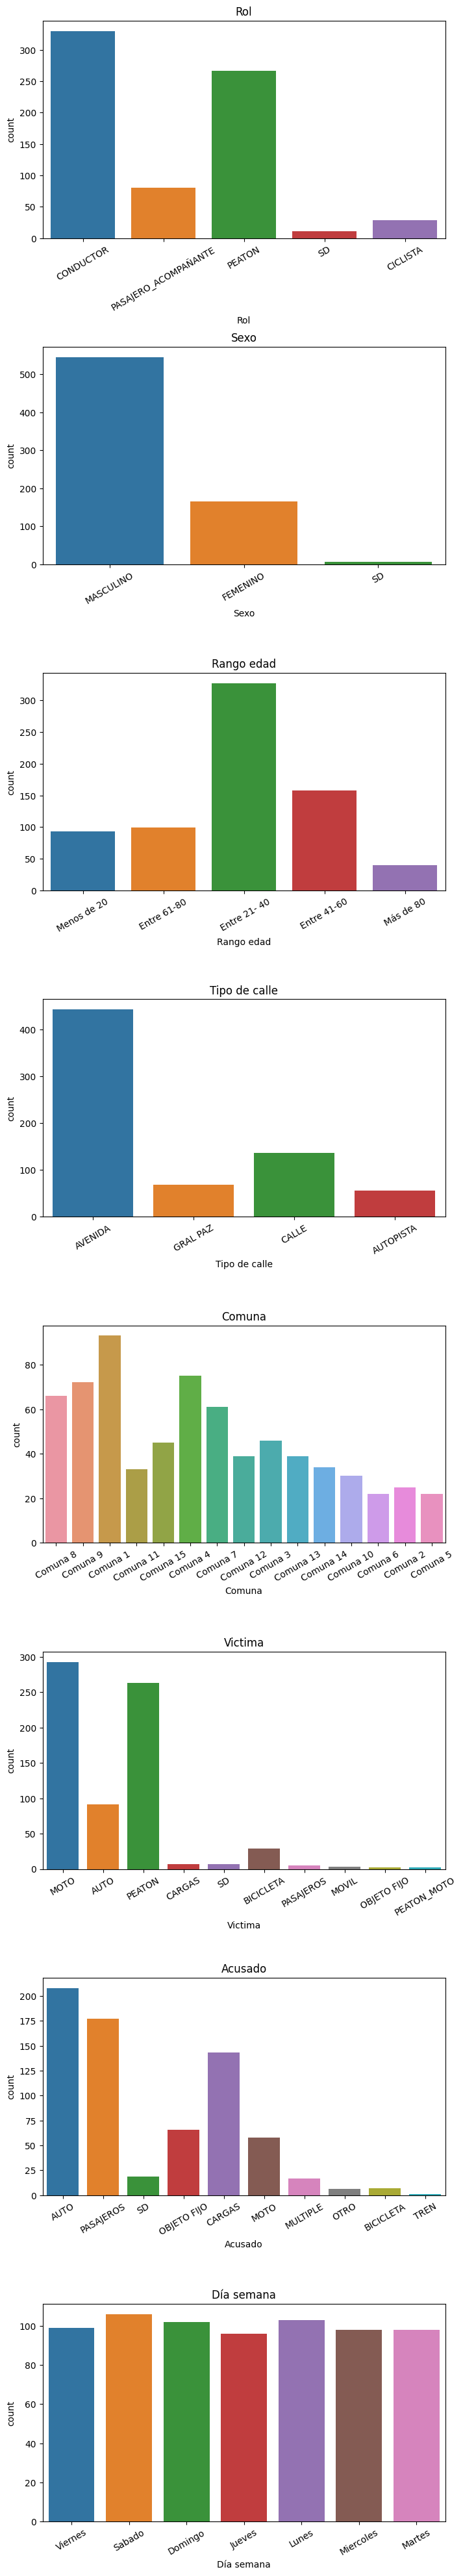

In [51]:
# Tomemos las variables categóricas y generemos gráficos de barras

col_cat = ['Rol', 'Sexo', 'Rango edad', 'Tipo de calle', 'Comuna', 'Victima', 'Acusado', 'Día semana']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(8,50))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Niveles de cada variable de interés:

    'Rol': 5 (Conductor, pasajero_acompañante, peaton, SD, ciclista)
    'Sexo': 3 (Masculino, Femenino, SD)
    'Rango Edad': 5 (Menos de 20 , Entre 21 y 40, Entre 41 y 60, Entre 61 y 80, Más de 80)
    'Tipo de Calle': 4 (Calle, Autopista, Gnal Paz, SD).
    'Comuna': 15 (Comuna 1... Comuna 15). Siendo la comuna 1 con más siniestros
    'Victima': 10 (Moto, auto, peaton, cargas, SD, bicicetas, pasajeros, movil, objeto fijo, Peaton_moto)
    'Acusado': 10 (Auto, Pasajeros, SD, Objeto fijo, Cargas, Moto, Multiple, Otro, Bicicleta, Tren)
    'Dia de Semana': 7 (Lunes , Martes, Miercoles, Jueves, Viernes)
    

### Podemos extraer algunas variables estadísticas descriptivas básicas


In [52]:
df.describe()

,Edad,Num víctimas,Año,Mes,Día,Hora,Pos x,Pos y,Coordenada x,Coordenada y
count,717.000000,702.000000,702.000000,702.000000,702.000000,701.000000,702.000000,702.000000,702.000000,702.000000
mean,39.050209,1.059829,2018.192308,6.693732,15.927350,11.573466,-58.441710,-34.619609,101980.113004,101070.596233
std,22.010669,0.254733,1.669154,3.584551,8.657478,6.667562,0.046383,0.035291,4253.717694,3914.938863
min,0.000000,1.000000,2016.000000,1.000000,1.000000,0.000000,-58.529942,-34.705250,93889.867899,91571.233073
25%,24.000000,1.000000,2017.000000,3.250000,9.000000,6.000000,-58.476995,-34.643801,98744.378735,98387.965943
50%,35.000000,1.000000,2018.000000,7.000000,16.000000,11.000000,-58.444513,-34.622835,101721.590022,100711.696729
75%,55.000000,1.000000,2019.000000,10.000000,23.000000,17.000000,-58.401892,-34.596969,105630.884244,103582.742374
max,95.000000,3.000000,2021.000000,12.000000,31.000000,23.000000,-58.356082,-34.534654,109831.098614,110496.053085


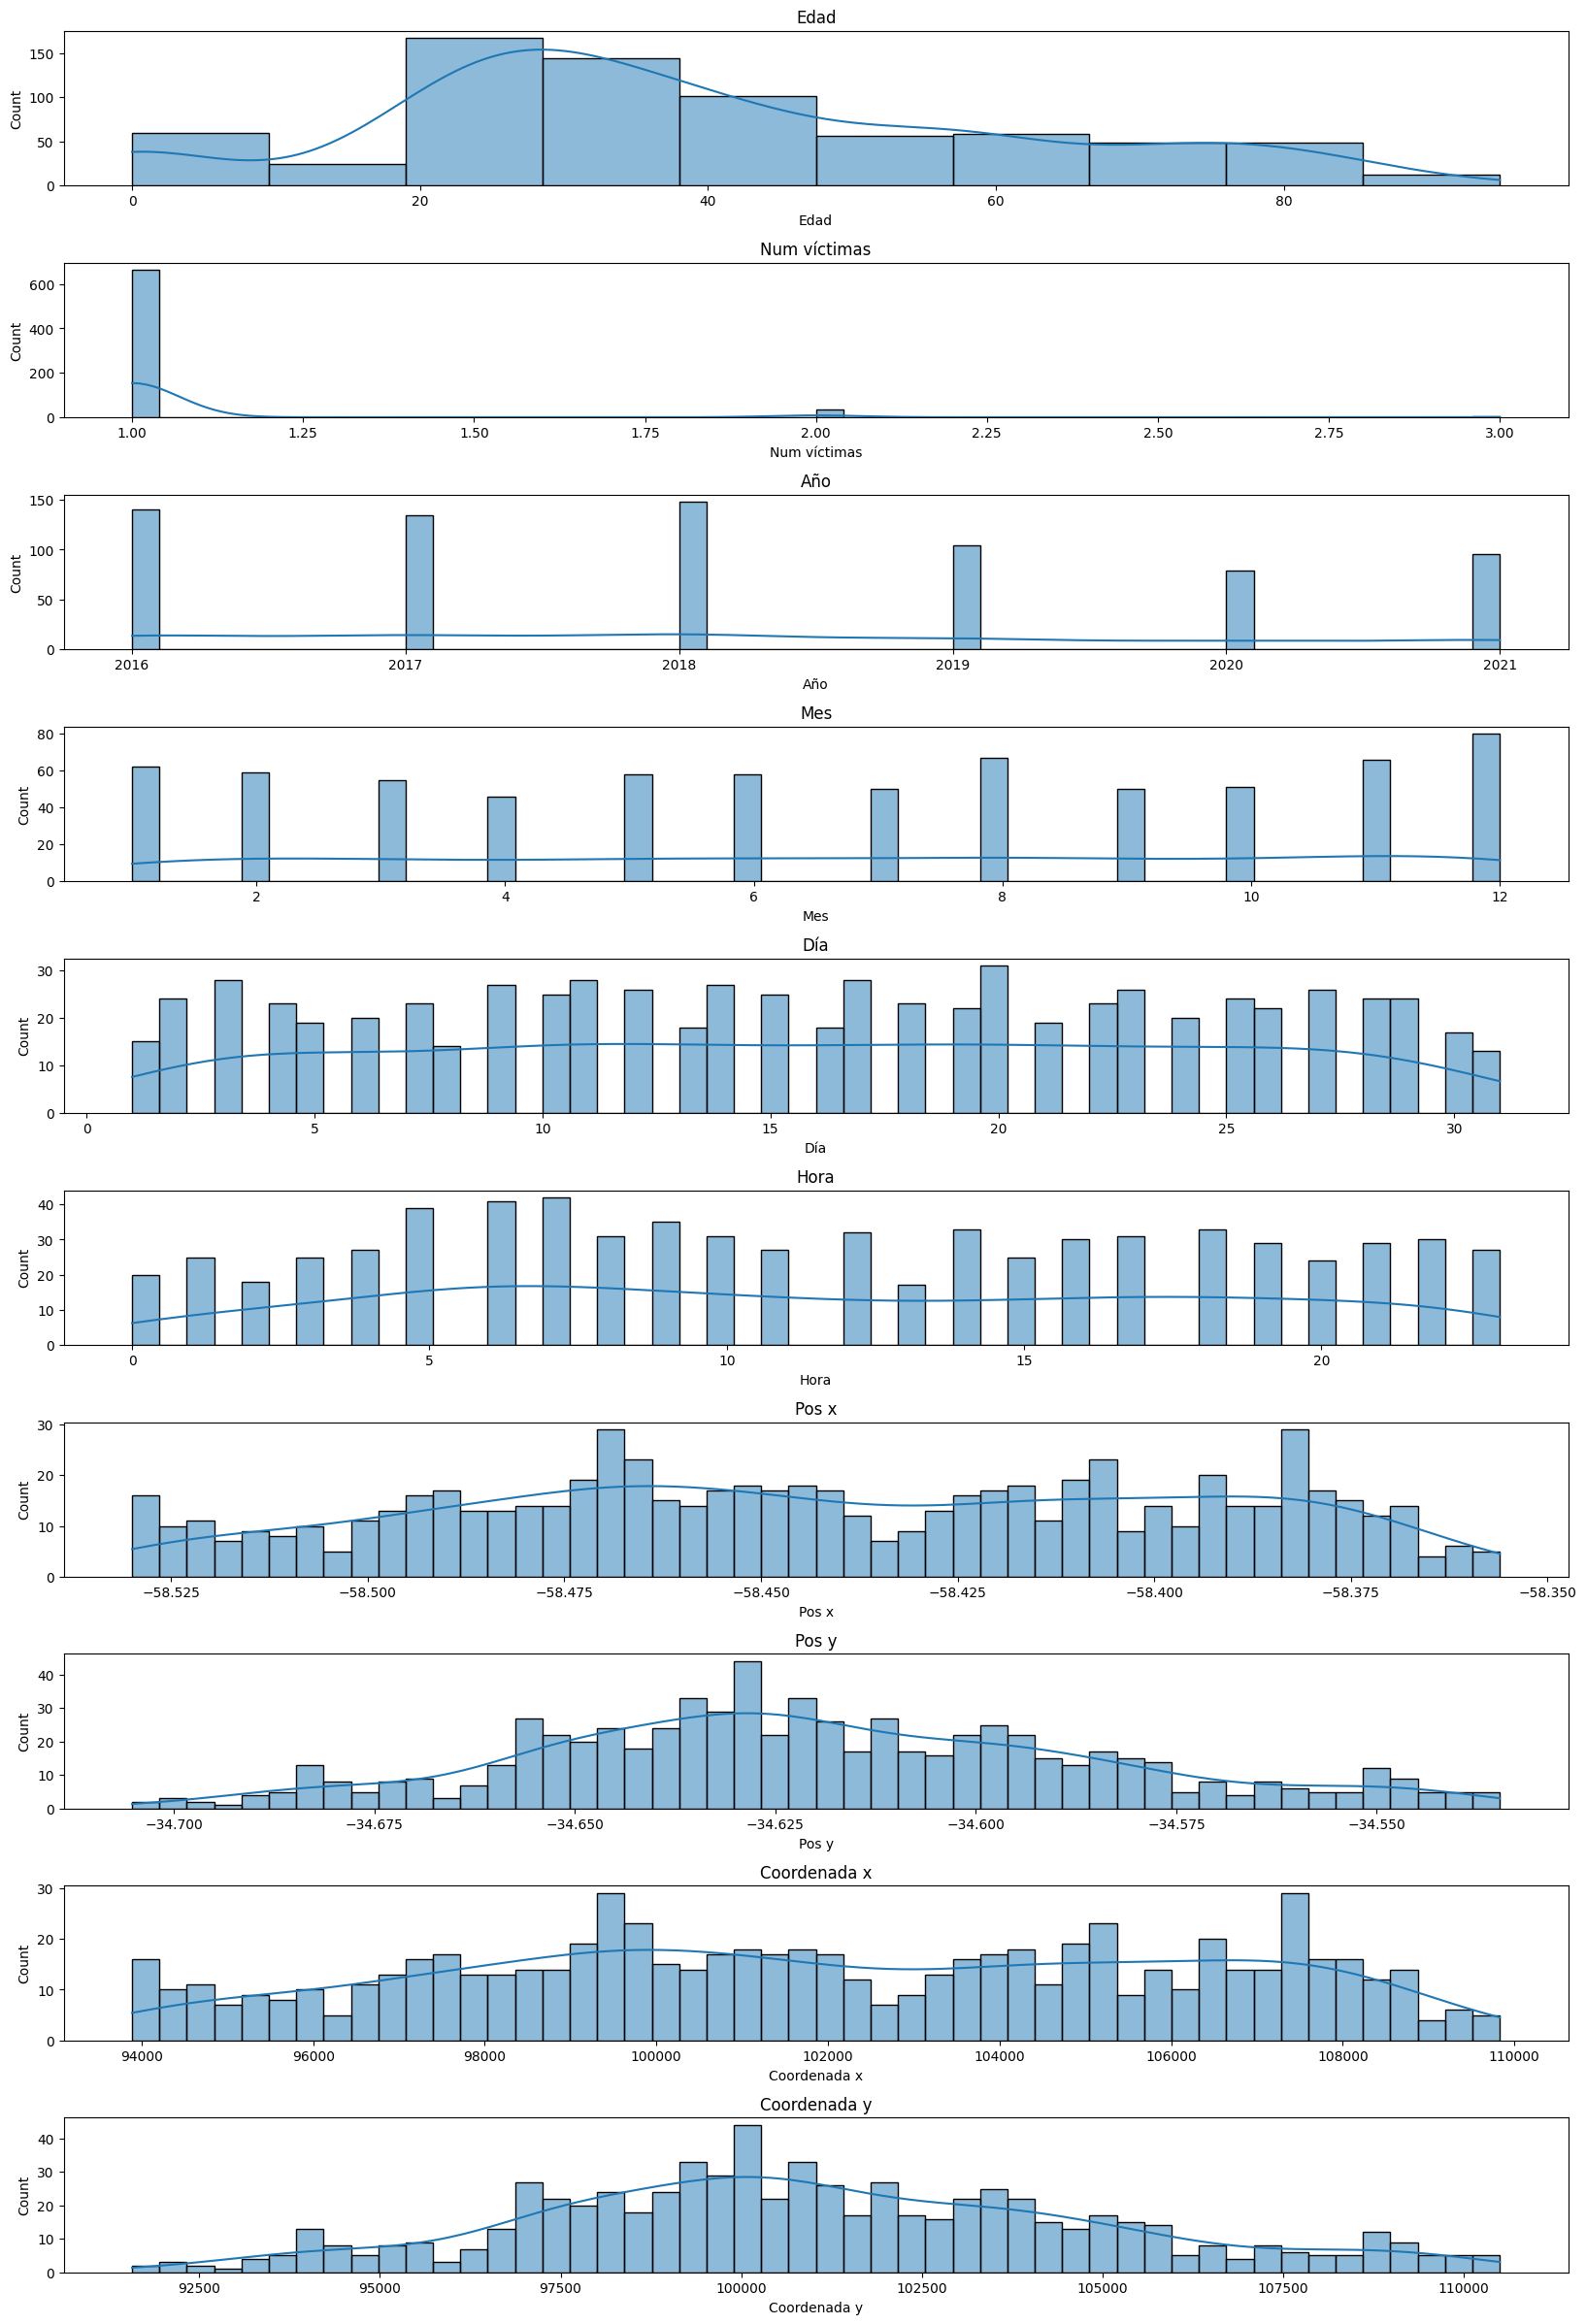

In [58]:
#Pero muchas veces es más útil graficar dichas variables

# Dibujar histogramas
col_num = ['Edad', 'Num víctimas', 'Año', 'Mes', 'Día', 'Hora', 'Pos x', 'Pos y', 'Coordenada x', 'Coordenada y']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(20,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'Edad':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=df, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

### Conclusiones

- La mayor parte de los siniestros ocurren entre las edades de 20 a 50 años. Con sesgo hacia la izquierda, hacia el rango de 21-40 años.
- Cabe resaltar que que la mayoría de los siniestros (más de 600) tuvieron alguna victima fatal 
- Los años con mas siniestros en la base de datos suministrada son 2016, 2017 y 2018. 
- De primera vista se ve que las horas más propensas a ocurrencias de siniestros la hora de salida 5-9 am

Se realiza la busqueda de datos con valores atípicos en las features, y se analiza si es necesario eliminarlos. Ya se había hecho en el ETL, pero se verifica nuevamente la condicion de OUTLIERS

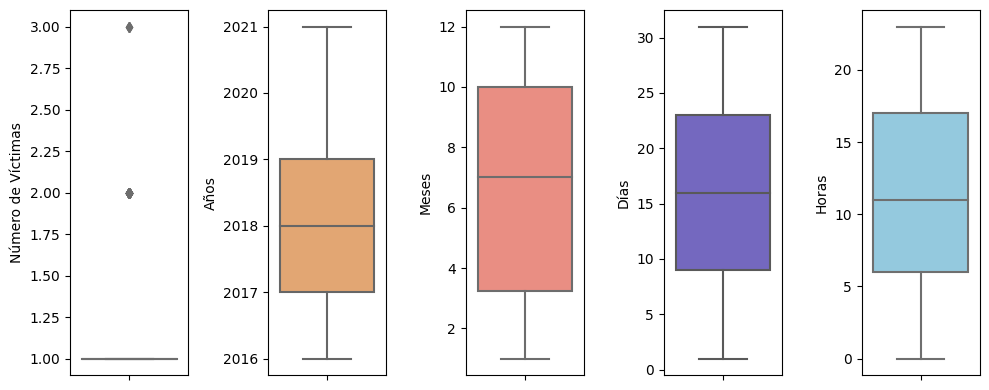

In [59]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=df, y='Num víctimas', color = "#FA8072")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=df, y='Año', color = "#F4A460")
plt.ylabel('Años')

plt.subplot(1, 5, 3) 
sns.boxplot(data=df, y='Mes', color = "#FA8072")
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.boxplot(data=df, y='Día', color = "#6A5ACD")
plt.ylabel('Días')

plt.subplot(1, 5, 5) 
sns.boxplot(data=df, y='Hora', color = "#87CEEB")
plt.ylabel('Horas')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

#### **Conclusión**
Los valores atípicos en la característica "Número de víctimas" (con valores 2 o 3) son el resultado de que la mayoría de los registros tienen el valor 1 en cuanto a las víctimas en los incidentes

### A - Variables Númericas


Dentro del dataset, algunas variables contienen valores numéricos, pero su significado puede variar según el contexto de los datos. Para explorar estas relaciones y comprender mejor cómo se relacionan entre sí, se recurre a un mapa de correlaciones. Este análisis ayuda a determinar si las variables numéricas están interrelacionadas o si en algunos casos es más apropiado tratarlas como variables categóricas. Este enfoque permite realizar un análisis más completo y preciso de los datos.

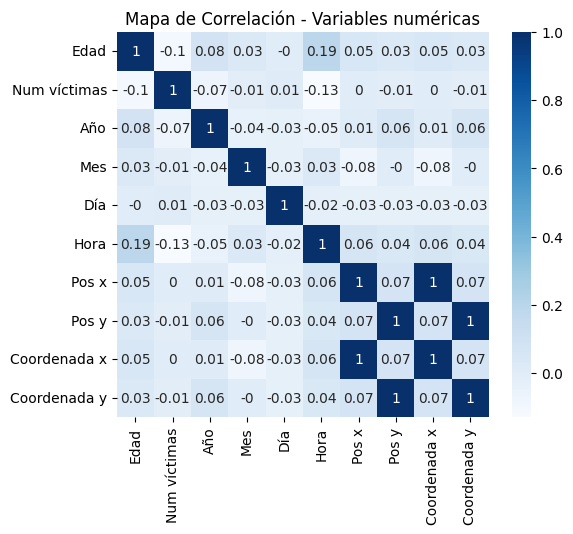

In [62]:
# Se genera un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(6,5))
sns.heatmap(corr,cmap='Blues', annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

En la tabla de correlación que examina todas las variables numéricas, se notan vínculos positivos sólidos entre las propiedades "Coordenada" y "Pos", lo cual era anticipado. También se percibe una conexión positiva más débil entre la variable "Edad" y "Hora". Las demás correlaciones resultan negativas, como era previsible, dado que el número de víctimas en un incidente no guarda relación con una fecha u hora particular.

Se comienza con Num Victimas dado que es la variable con mayor interés en el análisis

### `Num víctimas`
- Cantidad de víctimas fatales por siniestro vial

In [68]:
df["Num víctimas"].describe()

count    702.000000
mean       1.059829
std        0.254733
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Num víctimas, dtype: float64

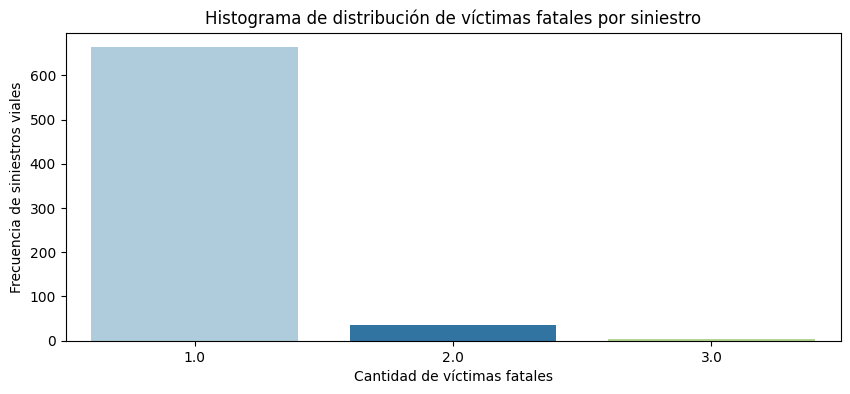

In [69]:
plt.figure(figsize=(10, 4))
# se filtran los valores sin datos o nulos 
df_filtrado = df[df["Num víctimas"] != 0]

#Se cuentan los datos de la columna y se calcula la frecuencia en que se distribuye
sns.countplot(df_filtrado, x='Num víctimas', palette="Paired")

plt.ylabel("Frecuencia de siniestros viales")
plt.xlabel("Cantidad de víctimas fatales")
plt.title("Histograma de distribución de víctimas fatales por siniestro")

plt.show()

#### **Conclusión**
- En la mayoría de los casos de siniestros viales, se registra una sola víctima fatal.
- Los siniestros con tres víctimas fatales son poco frecuentes.

#### Distribución temporal - Relación `Num vìctimas` con el tiempo

Se analizan los datos teniendo en cuenta diferentes horizontes temporales, para corroborar la existencia de algún tipo de evento o patrón importante.

In [70]:
# Agrupar por año y mes, y sumar el número de víctimas
rel_tiempo = df.groupby(['Año', 'Mes'])['Num víctimas'].sum().reset_index()

In [12]:
rel_tiempo

,Año,Mes,Num víctimas
0,2016.0,1.0,8.0
1,2016.0,2.0,12.0
2,2016.0,3.0,15.0
3,2016.0,4.0,9.0
4,2016.0,5.0,7.0
...,...,...,...
67,2021.0,8.0,9.0
68,2021.0,9.0,4.0
69,2021.0,10.0,5.0
70,2021.0,11.0,8.0


In [71]:
#Para la realización del gráfico se transforman los datos a tipo int
rel_tiempo["Año"]= rel_tiempo["Año"].astype("Int64")
rel_tiempo["Mes"]= rel_tiempo["Mes"].astype("Int64")

In [72]:
rel_tiempo

,Año,Mes,Num víctimas
0,2016,1,8.0
1,2016,2,12.0
2,2016,3,15.0
3,2016,4,9.0
4,2016,5,7.0
...,...,...,...
67,2021,8,9.0
68,2021,9,4.0
69,2021,10,5.0
70,2021,11,8.0


In [73]:
# Combinar AÑO y MES para obtener una sola variable de tiempo, creando la columna "Fecha" como str
rel_tiempo["Fecha"] = rel_tiempo["Año"].astype(str) + '-' + rel_tiempo["Mes"].astype(str)

# Convertir la variable de tiempo a formato datetime
rel_tiempo["Fecha"] = pd.to_datetime(rel_tiempo["Fecha"])

# Ordenar el DataFrame por fecha para que tenga orden cronológico
rel_tiempo = rel_tiempo.sort_values("Fecha")

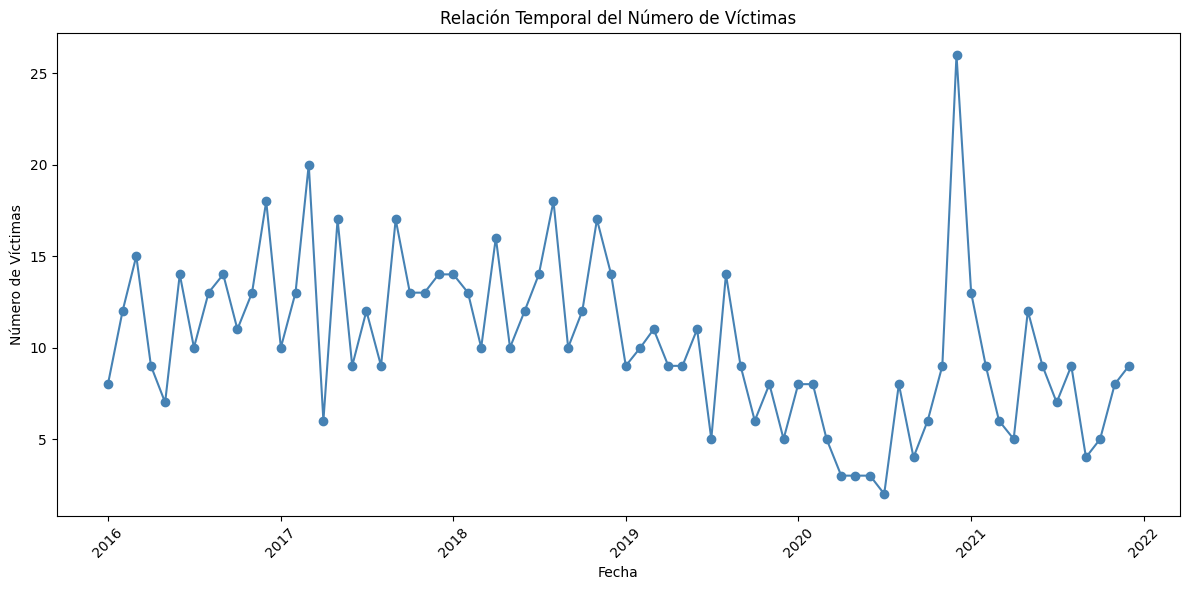

In [74]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(rel_tiempo["Fecha"], rel_tiempo["Num víctimas"], marker='o', color='steelblue')

# Añadir títulos y etiquetas
plt.title('Relación Temporal del Número de Víctimas')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### **Conclusión**

- El gráfico que ilustra la evolución temporal del número de víctimas revela que los años con más incidentes mortales son 2017 y 2018, seguidos de una tendencia a la baja en los años subsiguientes. Sin embargo, se destaca un pico considerable a finales de 2020, sobrepasando el récord previo de víctimas mensuales con 26 fallecidos. Este incremento coincide con la irrupción de la pandemia de COVID-19 en 2020, lo que tuvo un impacto notable en las estadísticas de accidentes de tráfico.

### Distribución temporal de víctimas 

#### Distribución mensual de víctimas fatales

Se crea un gráfico de barras que muestra la cantidad de víctimas por mes y agrega etiquetas de número de víctimas en cada barra.

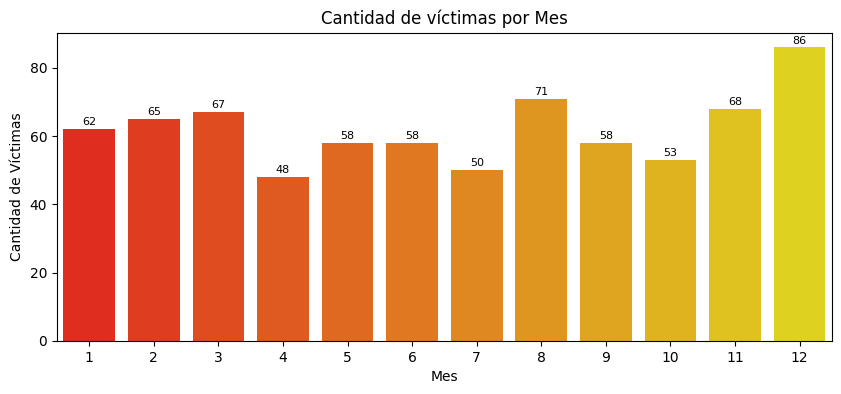

In [76]:
# Se agrupa por la cantidad de víctimas por mes
data = df.groupby(['Mes'])['Num víctimas'].sum().reset_index()
data["Mes"]=data["Mes"].astype("Int64")

# Se grafica
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Mes', y='Num víctimas', data=data, palette="autumn")
ax.set_title('Cantidad de víctimas por Mes')
ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

#### Distribución diaria de víctimas fatales

Se crea un gráfico de barras que muestra la cantidad de víctimas por día y agrega etiquetas de número de víctimas en cada barra.

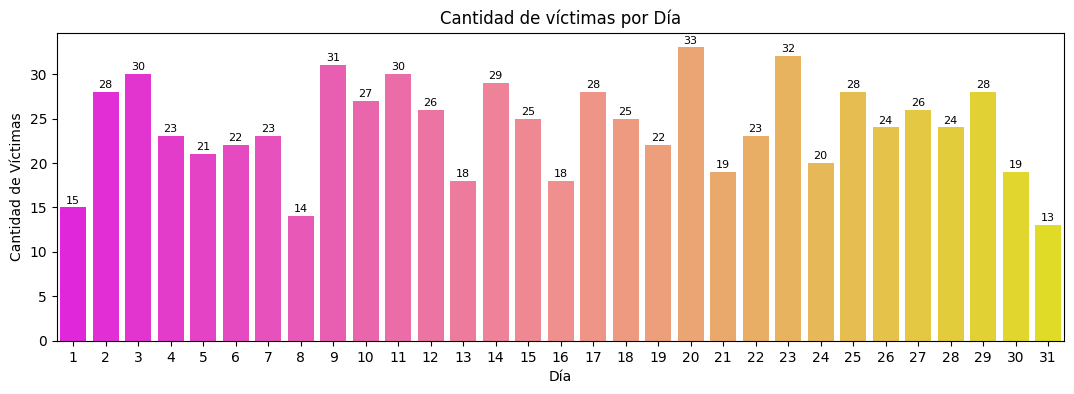

In [77]:
# Se agrupa por la cantidad de víctimas por dia
data = df.groupby(['Día'])['Num víctimas'].sum().reset_index()
data["Día"]=data["Día"].astype("Int64")

# Se grafica
plt.figure(figsize=(13,4))

ax = sns.barplot(x='Día', y='Num víctimas', data=data, palette="spring")
ax.set_title('Cantidad de víctimas por Día')
ax.set_xlabel('Día') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

Se crea un gráfico de barras que muestra la cantidad de víctimas por día de la semana y agrega etiquetas de número de víctimas en cada barra.

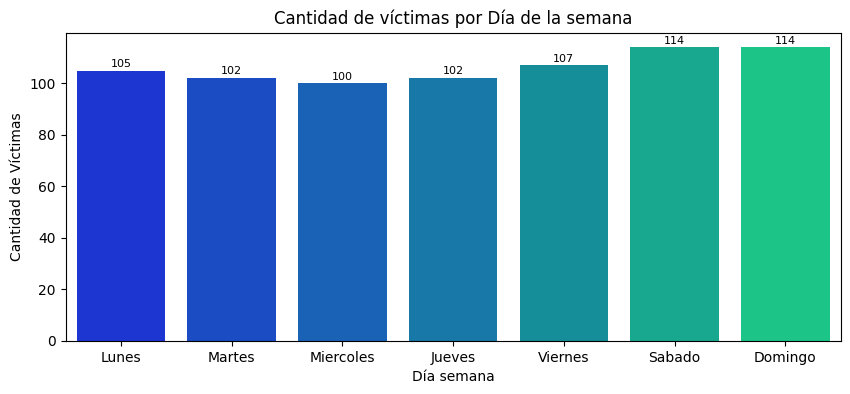

In [20]:
# Se agrupa por la cantidad de víctimas por dia semana
data = df.groupby(['Día semana'])['Num víctimas'].sum().reset_index()


# Define el orden de los días de la semana
orden_dias_semana = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

# Crea una columna 'Orden_dia_semana' en el DataFrame para representar el orden numérico de los días de la semana
data['Orden_dia_semana'] = data['Día semana'].apply(lambda x: orden_dias_semana.index(x))

# Ordena el DataFrame según el orden numérico de los días de la semana
data = data.sort_values(by='Orden_dia_semana')



# Se grafica
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Día semana', y='Num víctimas', data=data, palette="winter")
ax.set_title('Cantidad de víctimas por Día de la semana')
ax.set_xlabel('Día semana') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

#### Distribución relacionando horas y días, de víctimas fatales

Se crea un mapa de calor donde el eje x representa las horas del día, el eje y representa los días de la semana y el color de cada celda indica el número de víctimas. Se utiliza Seaborn para crear el mapa de calor y el argumento annot=True agrega los valores numéricos en las celdas del mapa de calor.

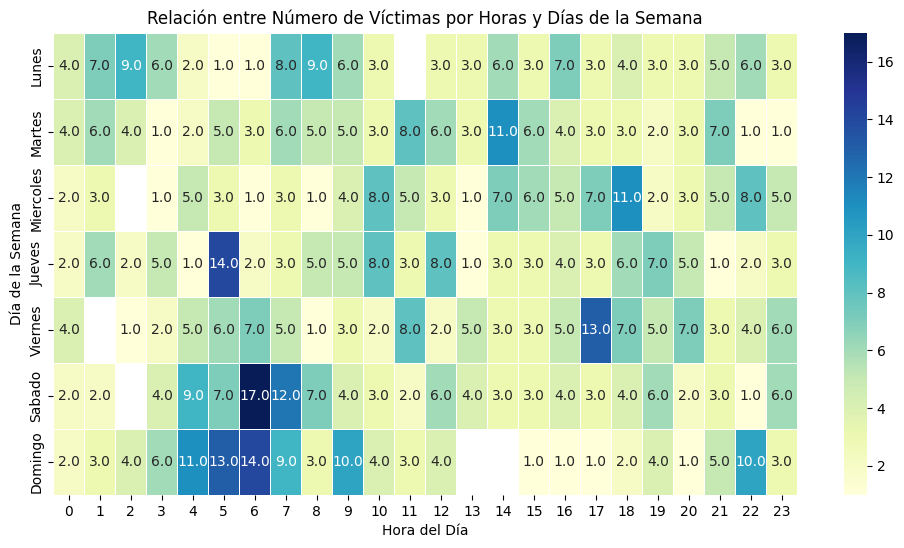

In [67]:
#Agrupa los datos en cantidad de victimas por dia de la semana y horas 
data = df.groupby(['Día semana', "Hora"])['Num víctimas'].sum().reset_index()
data["Hora"]=data["Hora"].astype("Int64")

# Define el orden de los días de la semana
orden_dias_semana = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

# Crea una columna 'Orden_dia_semana' en el DataFrame para representar el orden numérico de los días de la semana
data['Orden_dia_semana'] = data['Día semana'].apply(lambda x: orden_dias_semana.index(x))

# Ordena el DataFrame según el orden numérico de los días de la semana
data = data.sort_values(by='Orden_dia_semana')

# Crear una tabla pivot para los datos
pivot_data = data.pivot_table(index= 'Día semana', columns='Hora', values='Num víctimas', aggfunc='sum')
pivot_data = pivot_data.reindex(orden_dias_semana)

# Crear un mapa de calor (heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)

# Configurar etiquetas y título
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.title('Relación entre Número de Víctimas por Horas y Días de la Semana')

# Mostrar el gráfico
plt.show()


#### **Conclusión**
- El mes con mayor cantidad de `víctimas fatales` (86) es Diciembre .
- El `Día ` 20 de cada mes es el que lleva el mayor número de víctimas y los días `Sábado y Domingo` tienen la suma de 114 víctimas fatales, siendo la mayor cantidad.
- El mapa de calor indica que los días de fin de semana, en especial sábados y domingos se encuentran con un número más alto de víctimas fatales, siendo las horas entre 03.00 hs y 09.00 hs 

Puede decirse que los horarios con mayor peligrosidad tienen que ver con el ingreso laboral (05:00 hs - 09:00 hs), el horario del mediodía (12:00 hs - 14:00 hs) y salida del trabajo (17:00 hs - 18:00 hs). Durante la madrugada existen pocos siniestros. Y los fines de semana los la cantidad de siniestros es poca pero con mayor cantidad de víctimas

### `Edad` de las víctimas

Se crea un histograma de edades de las víctimas fatales y se utiliza el mismo eje para mostrar las estadísticas de la columna edades a través de un boxplot

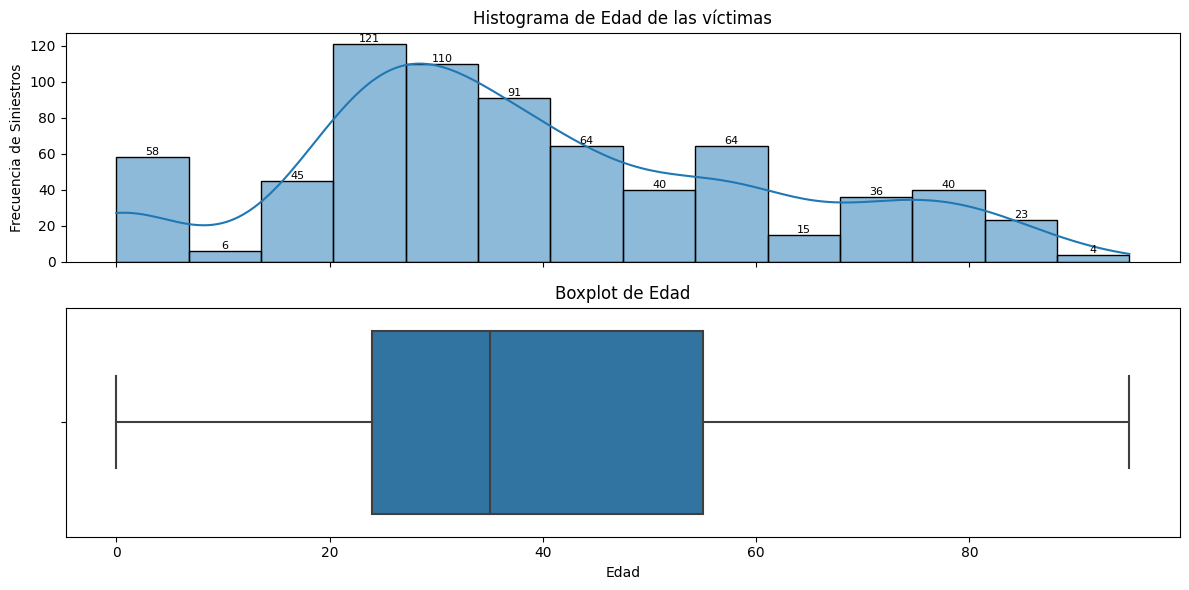

In [22]:
# Se crea una figura con un solo eje x compartido para tener dos gráficos en uno
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Se grafica el histograma de la edad
sns.histplot(df['Edad'], kde=True, ax=ax[0]) #se agrega la línea de suavizado
ax[0].set_title('Histograma de Edad de las víctimas') ; ax[0].set_ylabel('Frecuencia de Siniestros')

# Agregar etiquetas de datos en el histograma
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')

# Se grafica el boxplot de la edad
sns.boxplot(x=df['Edad'], ax=ax[1])
ax[1].set_title('Boxplot de Edad') ; ax[1].set_xlabel('Edad')

# Se ajusta y muestra el gráfico
plt.tight_layout()
plt.show()


In [23]:
df["Edad"].describe()

count    717.000000
mean      39.050209
std       22.010669
min        0.000000
25%       24.000000
50%       35.000000
75%       55.000000
max       95.000000
Name: Edad, dtype: float64

En una visualización en general se puede observar que el 75% de las víctimas fatales es menor que 55 años, la mediana es de 39 años.
Con respecto a la distribución del histograma, puede concluirse que la mayor cantiad de víctimas fatales se concentra entre los 20 a 40 años de edad

### Relación de `Edad` de las víctimas con la `Hora` del siniestro

Se realiza el análisis de ésta relación que resultó positiva en la matriz de correlación en las variables numéricas.
Se crea un gráfico de dispersión que representa la relación entre la edad de las víctimas en el eje x y la hora del siniestro en el eje y. 



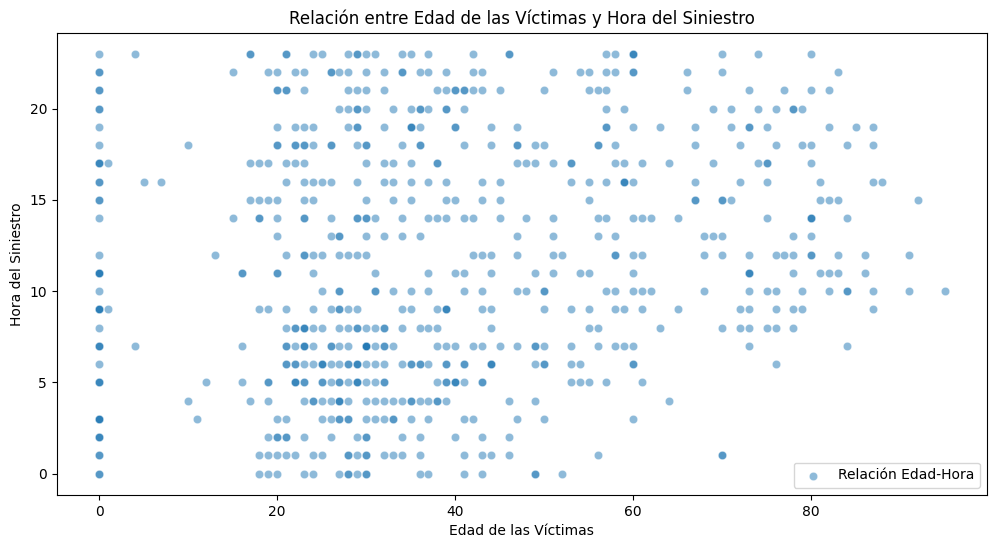

In [24]:
#Agrupa los datos en cantidad de victimas por edad y horas 
data = df.groupby(['Edad', "Hora"])['Num víctimas'].sum().reset_index()
data["Edad"]=data["Edad"].astype("Int64")
data["Hora"]=data["Hora"].astype("Int64")



# Crear un gráfico de dispersión para la relación entre edad y hora
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='Edad', y='Hora', alpha=0.5, label='Relación Edad-Hora') # se utiliza alpha para transparencia de los puntos
plt.xlabel('Edad de las Víctimas')
plt.ylabel('Hora del Siniestro')
plt.title('Relación entre Edad de las Víctimas y Hora del Siniestro')

# Agregar una leyenda
plt.legend(loc='best') 
# Mostrar el gráfico
plt.show()


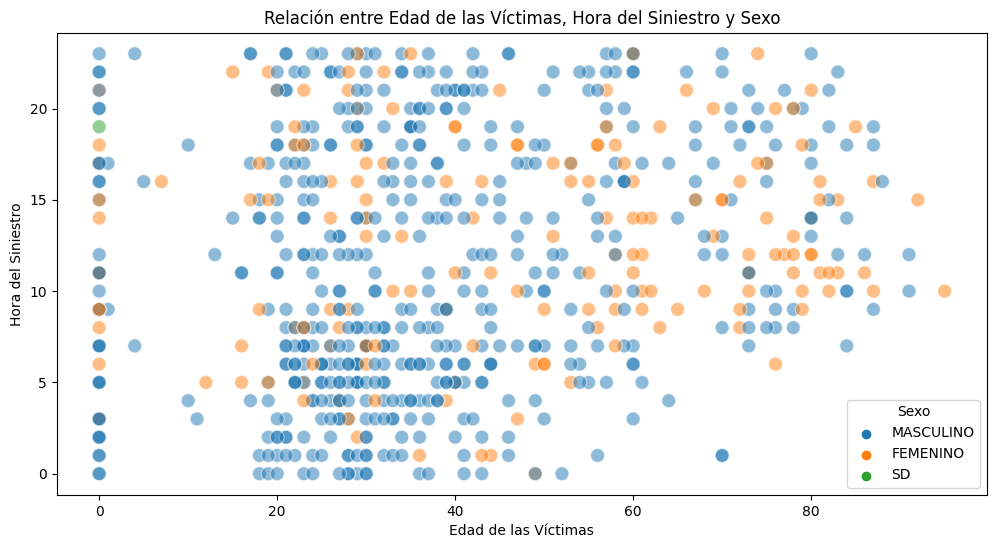

In [25]:
#Agrupa los datos en cantidad de victimas por edad y horas 
data = df.groupby(['Edad', "Hora", "Sexo"])['Num víctimas'].sum().reset_index()
data["Edad"]=data["Edad"].astype("Int64")
data["Hora"]=data["Hora"].astype("Int64")

# Crear un gráfico de dispersión para la relación entre edad, hora y sexo
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Edad', y='Hora', hue='Sexo', alpha=0.5, palette='tab10', s=100)

# Agregar etiquetas a los ejes
plt.xlabel('Edad de las Víctimas')
plt.ylabel('Hora del Siniestro')
plt.title('Relación entre Edad de las Víctimas, Hora del Siniestro y Sexo')

# Agregar una leyenda
plt.legend(title='Sexo')

# Mostrar el gráfico
plt.show()


#### **Conclusión**
- Las gráficas de dispersión presentadas arriba, señalan la relación entre las edades de 20 a 40 años de las víctimas y las horas de mayor cantidad de ocurrencia de siniestros viales; siendo entre las 5 a 9 hs y 17 a 18 hs
- Cuando se le agrega la distinción por Sexo, se muestra una mayor cantidad de víctimas `Masculinas`, con respecto a las `Femeninas` en ésta relación

### Distribución etaria  de víctimas según `Sexo`

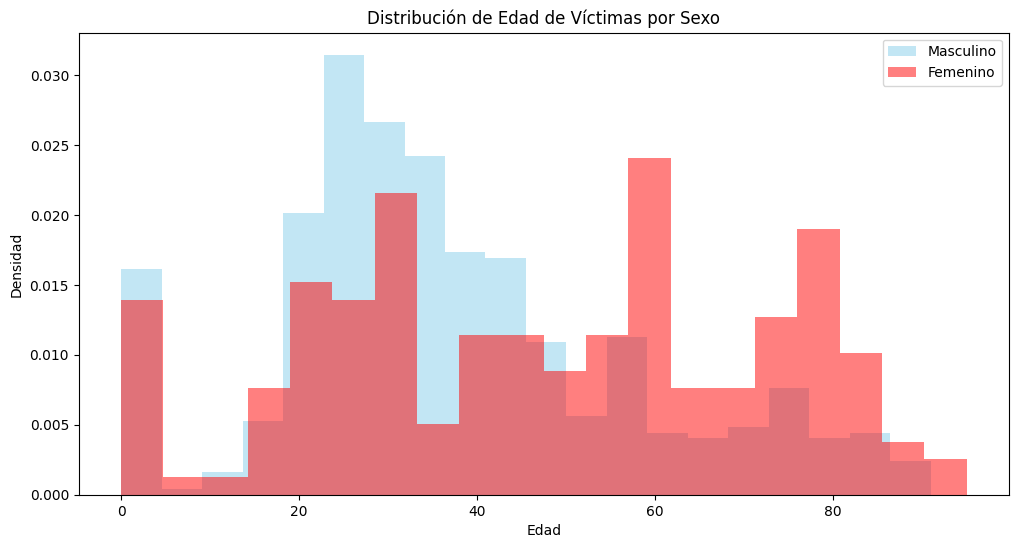

In [26]:
# Filtrar por sexo masculino
masculino = df[df['Sexo'] == 'MASCULINO']['Edad'].dropna()

# Filtrar por sexo femenino
femenino = df[df['Sexo'] == 'FEMENINO']['Edad'].dropna()

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(masculino, bins=20, alpha=0.5, color='skyblue', label='Masculino', density=True)
plt.hist(femenino, bins=20, alpha=0.5, color='red', label='Femenino', density=True)
plt.title('Distribución de Edad de Víctimas por Sexo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

#### **Conclusión**
El gráfico muestra dos histogramas sobre el mismo eje a fin de poder comparar de manera más visual la diferencia entre las víctimas de ambos sexos.
- como resultado arroja que las victimas de sexo Masculino son de 20 a 40 años de Edad
- las víctimas de sexo Femenino son de entre 40, 60 y 80 años de Edad.

### Distribución temporal de las Edades de las víctimas

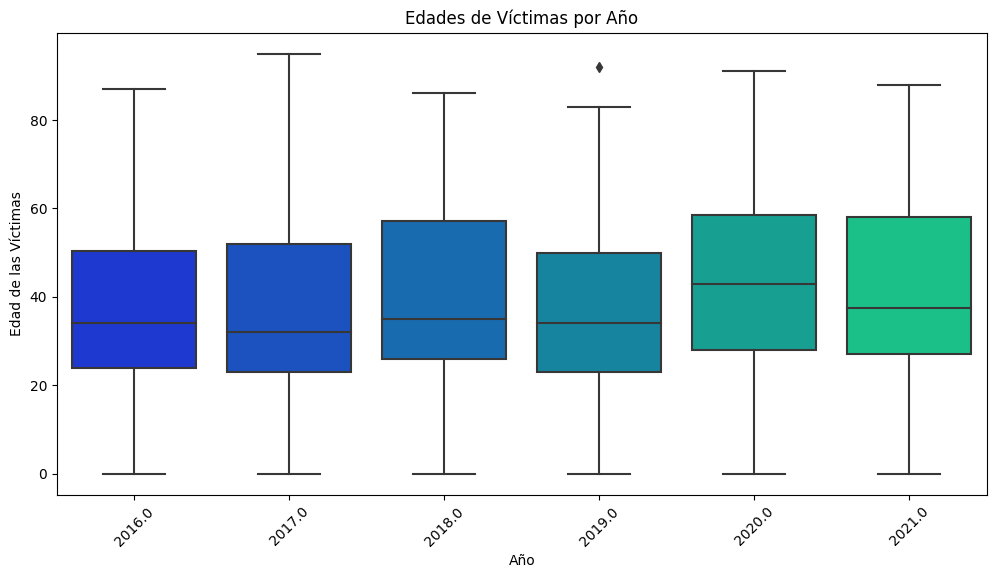

In [27]:

#Agrupa los datos en cantidad de victimas por edad y  año
data = df.groupby(['Edad', "Año"])['Num víctimas'].sum().reset_index()


#Se crea el gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Edad', data=df, palette="winter")

plt.title('Edades de Víctimas por Año') ; plt.xlabel('Año') ; plt.ylabel('Edad de las Víctimas')
# Cambia el formato de las etiquetas del eje x a enteros
plt.xticks(rotation=45)
# Se muestra el gráfico
plt.show()


#### **Conclusión**
El gráfico confirma que a través del tiempo, la mediana de la edad de las víctimas sigue siendo alrrededor de los 39 años y supera esta barrera en el año 2020

### Distribución espacial de los siniestros con víctimas `Coordenadas`

Para usar Geopandas, primero se define un sistema de referencia de coordenadas (CRS) y éste le dice a Python como se relacionan estas coordenadas que instanciamos con los diferentes lugares del planeta

In [28]:
# Iniciamos CRS

crs={'init':'epsg:4326'}

In [29]:
#Definimos la geometría según nuestro dataset
geometry=[Point(xy) for xy in zip(df["Pos x"], df["Pos y"])]

C:\Users\Administrador\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

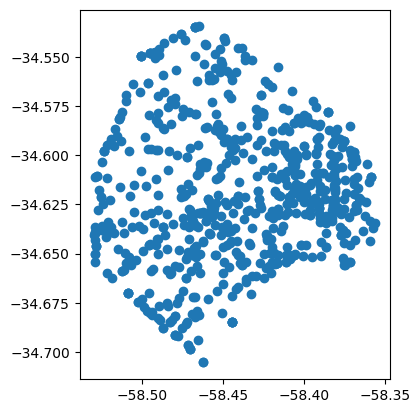

In [30]:
#Ua vez que tenemos el sistema de referencia decoordenadas y la geometría; se procede a la carga de los datos
geodata=gpd.GeoDataFrame(df,crs=crs, geometry=geometry)

#Se imprime el resultante que luego será introducido en un mapa
geodata.plot()

Una vez que el mapa de geometría está listo, se debe cargar el archivo de las comunas del la ciudad de Buenos Aires que se extrajo de https://data.buenosaires.gob.ar/dataset/comunas/resource/Juqdkmgo-612222-resource que debe ser un archivo Shapefile (SHP)

In [31]:
#Extraer el archivo
shapefile = gpd.read_file(r"./info/comunas_wgs84.shp")

C:\Users\Administrador\AppData\Roaming\Python\Python37\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


Text(158.98305973900304, 0.5, 'Latitud')

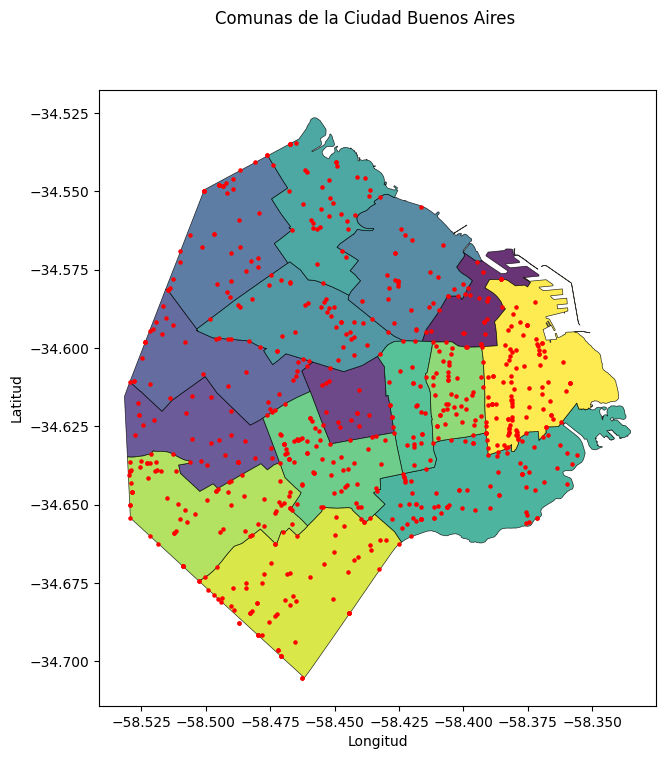

In [81]:
#Se realiza sobre el mapa de CABA la presentación de los puntos de referencia a los siniestros viales

#Crea ejes y figuras
fig, ax = plt.subplots(figsize=(10,8))

#Dibujar el Shapefile
shapefile.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=0.8,linewidth=0.5,cmap="viridis")

#Dibujar los datos geoespaciales
geodata.plot(ax=ax, color='red', markersize=5);

#Agregar título y etiquetas de ejes
fig.suptitle('Comunas de la Ciudad Buenos Aires', fontsize=12)
ax.set_xlabel('Longitud', fontsize=10)
ax.set_ylabel('Latitud', fontsize='medium')

#### **Conclusión**
- La gráfica muestra la concentración de los puntos rojos representando siniestros con víctimas fatales, hacia la zona Este del mapa de CABA sobre la comuna 1 y 4

### B - Variables Categóricas

### Distribución por `Comuna`

In [33]:
#Se crea un dataset con el número de víctimas por Barrio y Comuna
Total_comuna=df.groupby(["Comuna", "Barrios"])["Num víctimas"].sum().reset_index()
Total_comuna=Total_comuna.sort_values(by="Num víctimas", ascending=False)
Total_comuna

,Comuna,Barrios,Num víctimas
0,Comuna 1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,101.0
9,Comuna 4,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,81.0
14,Comuna 9,LINIERS - MATADEROS - PARQUE AVELLANEDA,74.0
13,Comuna 8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,70.0
12,Comuna 7,FLORES - PARQUE CHACABUCO,65.0
8,Comuna 3,BALVANERA - SAN CRISTOBAL,48.0
6,Comuna 15,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...,47.0
3,Comuna 12,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,43.0
4,Comuna 13,BELGRANO - COLEGIALES - NUÃ‘EZ,39.0
5,Comuna 14,PALERMO,38.0


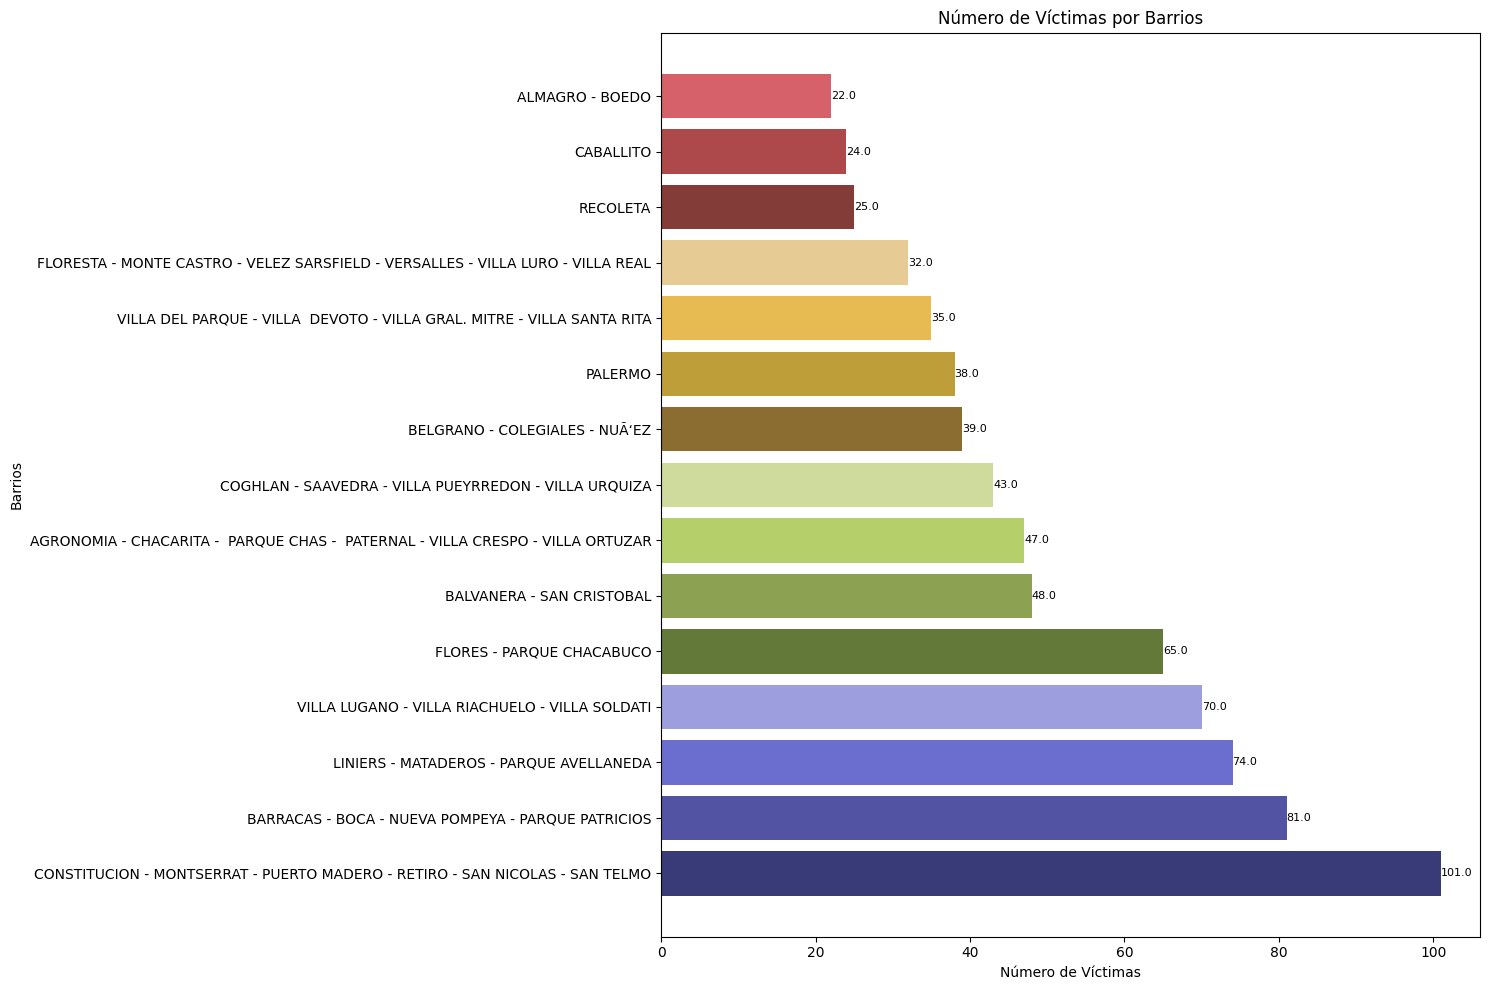

In [34]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(15, 10))

# Colores para las barras
colores = plt.cm.tab20b(range(len(Total_comuna)))

# Dibujar las barras horizontales
plt.barh(Total_comuna["Barrios"], Total_comuna["Num víctimas"], color=colores)

# Etiquetas de eje x e y
plt.xlabel('Número de Víctimas')
plt.ylabel('Barrios')

# Título del gráfico
plt.title('Número de Víctimas por Barrios')

# Agregar el número de víctimas sobre cada barra
for i, v in enumerate(Total_comuna["Num víctimas"]):
    plt.text(v, i, str(v), va='center', fontsize=8, color='black')


plt.tight_layout()
plt.show()

#### **Conclusión**
- El dataset presenta el total de 15 comunas que conforman los distintos barrios de CABA. Cada comuna esta formada por uno o varios Barrios.
- De la tabla `Total_comunas` resultan con mayor cantidad de víctimas fatales las Comunas 1, 4, 9, 8 y 7.
- La comuna 1 supera por 20 en víctimas a la comuna 4, que le sigue en orden 

Ello sugiere que pueden ser Barrios donde existan arterias muy transitadas al momento de la entrada ó salida del horario laboral

### Distribución de los `Tipos de Calles` donde suceden los siniestros

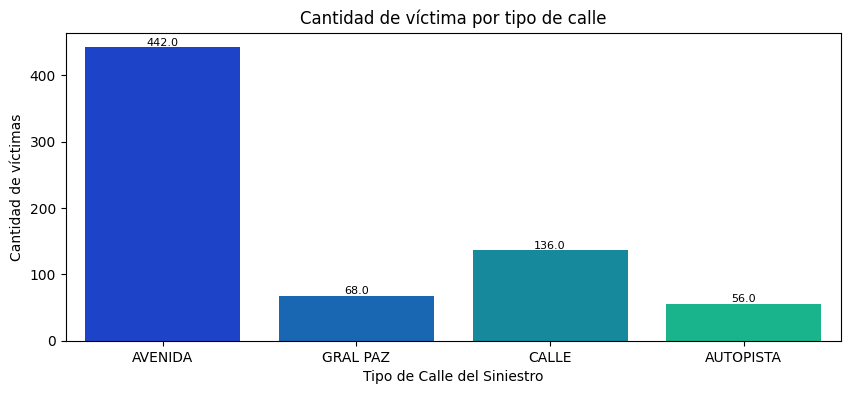

In [35]:
#Se crea el gráfico de barras
plt.figure(figsize=(10, 4))

ax=sns.countplot(df, x='Tipo de calle', palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

#Se titulan los ejes
plt.xlabel('Tipo de Calle del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctima por tipo de calle')

plt.show()

#### **Conclusión**
- Del análisis del gráfico resulta que el mayor número de víctimas fatales se producen en `Avenida`; secundado por `Calle`.

### Distribución de `Participantes` en los siniestros

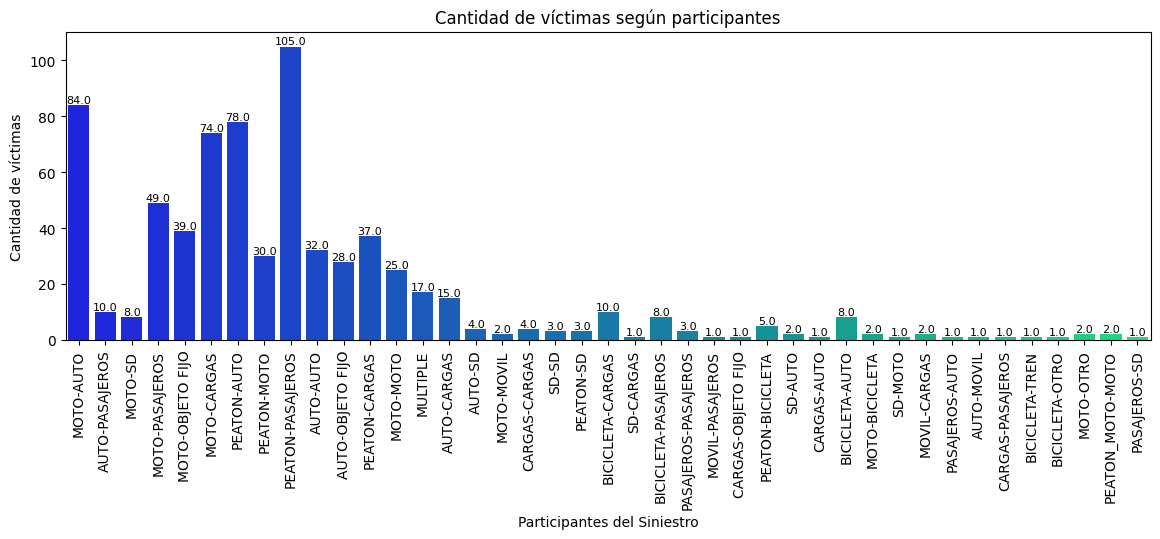

In [36]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Participantes", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

#Se ubican los titulos de las barras en 90 grados
plt.xticks(rotation=90)

#Se titulan los ejes
plt.xlabel('Participantes del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según participantes')

plt.show()

#### **Conclusión**
- Los valores de participación que concentran más víctimas están en `PEATON-PASAJEROS`, esto según el diccionario de datos, se refiere a Peatón: es cualquier víctima distinta de cualquier ocupante de un vehículo; Pasajero: es cualquier persona que se encuentra dentro, descendiendo o ascendiendo del transporte público u omnibús de larga distancia.
- Le siguen en importancia de víctimas `MOTO-AUTO` , `PEATON-AUTO` y `MOTO-CARGAS`

En la columna `Participantes` puede interpretarse que la primer palabra se relaciona a quien fue la `Víctima` y la segunda palabra se refiere al `Acusado`

### Distribución de `Acusados` en los siniestros

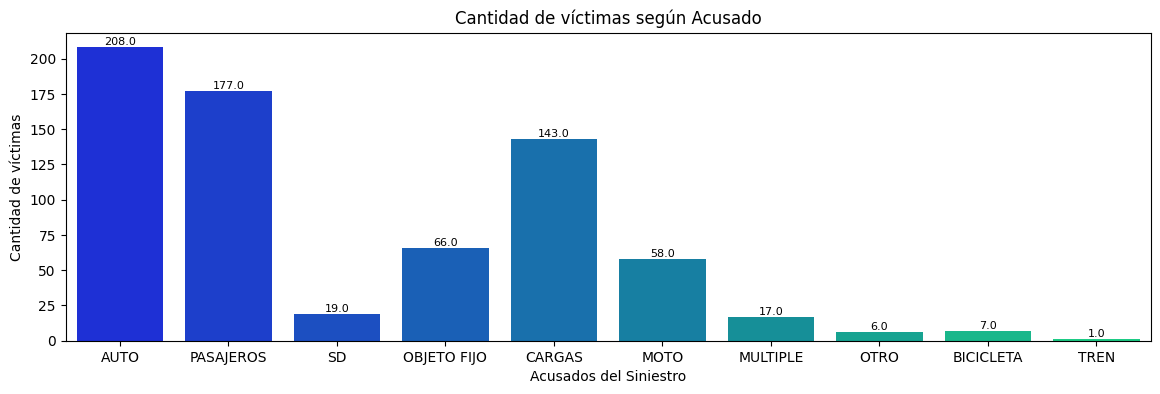

In [37]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Acusado", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Acusados del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según Acusado')

plt.show()

#### **Conclusión**
- Se puede visualizar que los que causan más víctimas son los  `Autos`, `Cargas` y `Pasajeros`. Esto se relaciona con el punto anterior.

### Distribución de `Víctimas` en los siniestros

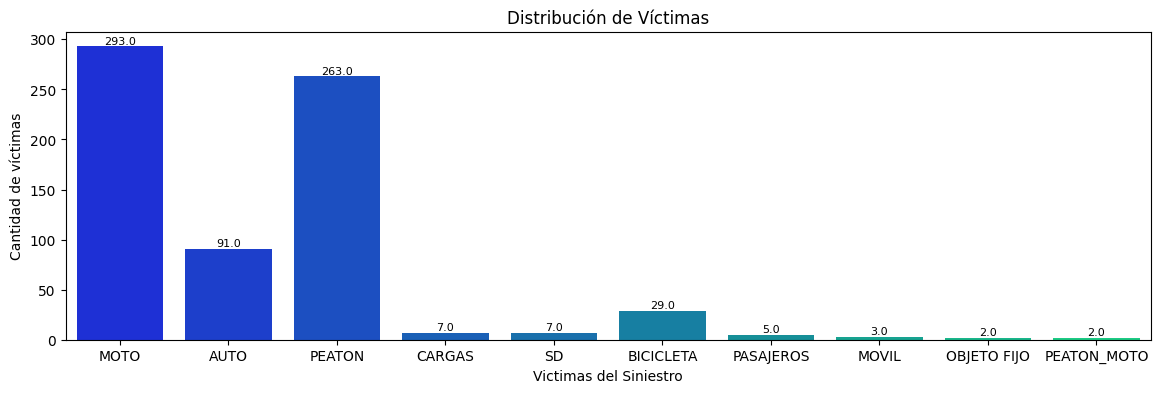

In [39]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Victima", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Victimas del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Distribución de Víctimas')

plt.show()

#### **Conclusión**
- Se puede visualizar que las víctimas son  `Moto`, `Peaton` y `Carga`. Esto se relaciona con ambos puntos anteriores.

### Matriz de confusión 

Se crea una tabla ce contingencia que relacione los datos de las columnas `Víctima` y `Acusado` para analizar de manera más visual los datos de los siniestros y sus participantes.

In [36]:
tabla_contingencia = pd.crosstab(df['Victima'], df['Acusado'])

# Visualizar la tabla de contingencia
tabla_contingencia

Acusado,AUTO,BICICLETA,CARGAS,MOTO,MULTIPLE,OBJETO FIJO,OTRO,PASAJEROS,SD,TREN
Victima,,,,,,,,,,
AUTO,32,0,15,0,3,26,1,10,4,0
BICICLETA,8,0,10,0,1,0,1,8,0,1
CARGAS,1,0,4,0,0,1,0,1,0,0
MOTO,84,2,74,25,8,39,4,49,8,0
MOVIL,0,0,2,0,0,0,0,1,0,0
OBJETO FIJO,2,0,0,0,0,0,0,0,0,0
PASAJEROS,1,0,0,0,0,0,0,3,1,0
PEATON,78,5,37,30,5,0,0,105,3,0
PEATON_MOTO,0,0,0,2,0,0,0,0,0,0


#### **Conclusión**
Aquí se encuentran de manera más clara en sus resultados la intervención en cada siniestro.
- Cuando el acusado es `Auto`, la mayoría de las víctimas son Autos, Motos y Peatones.
- Cuando el acusado es `Cargas`, las victimas son variadas; siendo Motos y Peatones los más encontrados.
- Cuando el acusado es `Pasajeros`, las víctimas son principalmente Peatones y Motos.

La frecuencia de víctimas Motos y Peatones es alta, y se relacionan con casi todos los tipos de Acusados.


### Proporción de víctimas por `Sexo`

Text(0.5, 1.0, 'Proporción de Víctimas por Sexo')

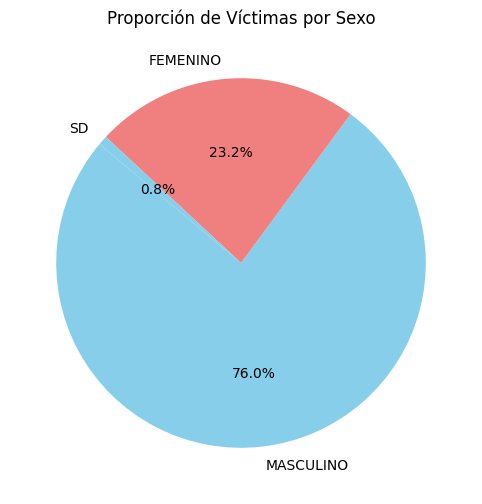

In [40]:
# Calcular la proporción de víctimas por sexo
proporcion = df['Sexo'].value_counts(normalize=True) * 100

# Preparar los datos para el gráfico de torta
labels = proporcion.index
sizes = proporcion.values

# Crear el gráfico de torta
plt.figure(figsize=(12, 6))

# Gráfico de torta

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Víctimas por Sexo')

### Distribución de los roles de las víctimas por `Sexo`

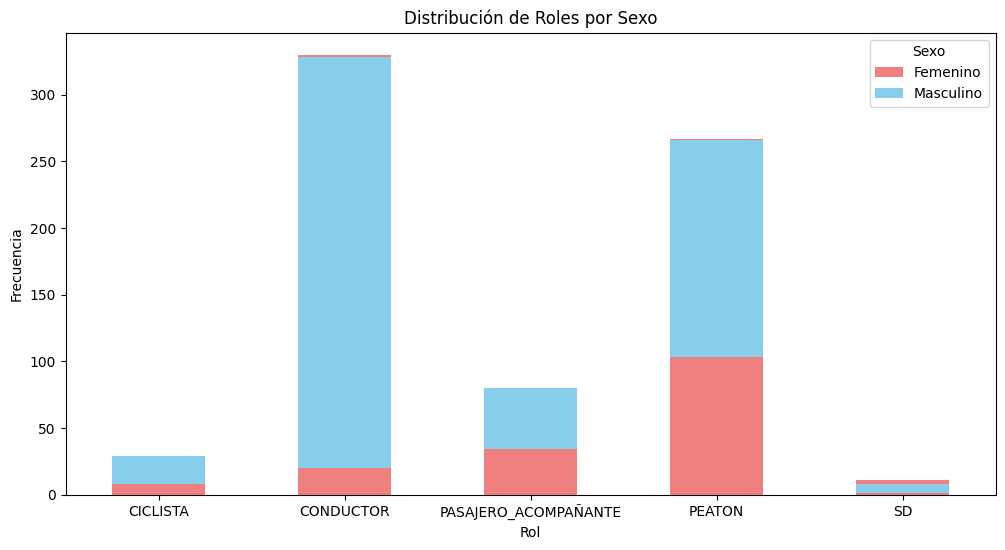

In [41]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(df['Rol'], df['Sexo'])

# Crear un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["lightcoral",'skyblue'])
plt.title('Distribución de Roles por Sexo')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

#### **Conclusión**
La distribución por roles de las víctimas muestra que
- la mayor cantidad de siniestros las victimas tienen como rol `Conductor`, seguida por `Peatón`.
- para las víctimas de sexo `Masculino`, el rol más frecuente en los siniestros es como conductor, seguido por peatón.
- para las víctimas de sexo `Femenino`, el rol más frecuente en los siniestros es como peatón, seguido por pasajero-acompañante

### Distribucíon de víctimas según `sexo` y `tipo de vehículo`

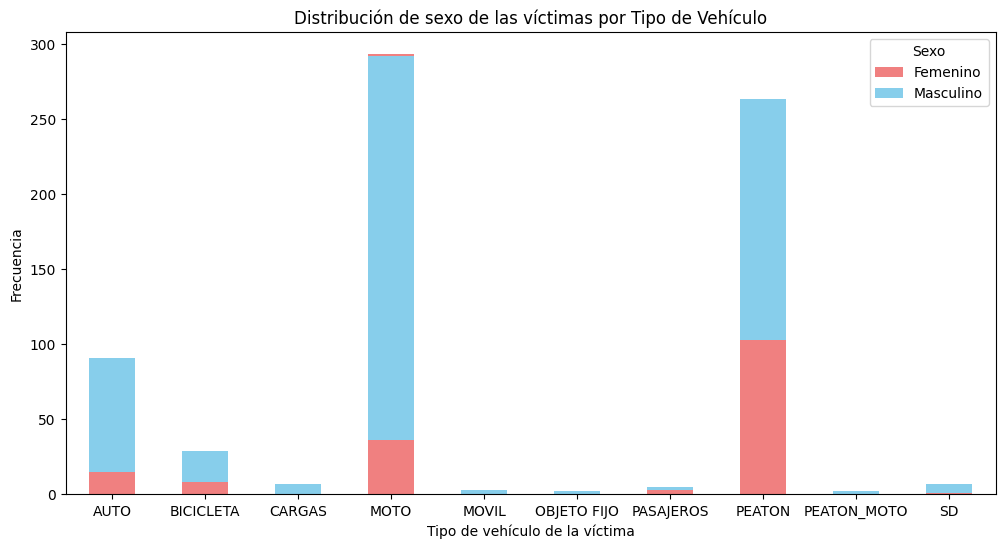

In [42]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(df['Victima'], df['Sexo'])

# Crear un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["lightcoral",'skyblue'])
plt.title('Distribución de sexo de las víctimas por Tipo de Vehículo')
plt.xlabel('Tipo de vehículo de la víctima')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

#### **Conclusión**

- La mayor cantidad de accidentes con víctimas fatales son en `Moto` y además con más proporción de Masculinos
- Los `Peatones`, son el segundo tipo de víctima, en el que la mayor proporción son Masculinos pero con menor diferencia que en la primera.